In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
print(os.getcwd())

C:\Users\nesri\repos\projekt_dental


In [3]:
df = pd.read_excel("merged_df_25.08last.xlsx")

In [4]:
df.head()

Location  Period TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
0     Belgium    2019          2 122.1                 185.2            14.4   
1      Rwanda    2019              3.5                   0.3             2.0   
2      Jordan    2019             74.7                   7.4             7.3   
3    Paraguay    2019             51.3                   7.2             8.2   
4  Kyrgyzstan    2019              3.9                   0.6            10.3   

   PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
0             24.8                 27.4                              30.2   
1             21.2                 31.4                              40.0   
2             13.8                 38.5                              42.8   
3             15.1                 26.7                              42.7   
4             11.7                 35.0                              47.9   

  ProductivityLossRate both_cancer female_cancer male_cancer  
0              2 771.3         992           352         640  
1                 20.1          99            32          67  
2                120.1          97            37          60  
3                107.5          96            11          85  
4                 26.5          93            26          67

| S√ºtun Adƒ±                        | A√ßƒ±klama                                                                 |
|----------------------------------|--------------------------------------------------------------------------|
| Location                         | √úlke adƒ± (√∂rneƒüin: Angola)                                               |                                          | Period                           | Veri yƒ±lƒ± (√∂rneƒüin: 2019)                                                |
| TotalExpenditure                 | Toplam harcama                                                           |
| PerCapitaExpenditure             | Ki≈üi ba≈üƒ±na harcama                                                      |
| EdentulismRate                   | Di≈üsizlik oranƒ±                                                          |
| PeriodontalRate                  | Periodontal hastalƒ±k oranƒ±                                               |
| UntreatedCariesRate              | Tedavi edilmemi≈ü √ß√ºr√ºk oranƒ±                                             |
| UntreatedDeciduousCaries11_9Rate | √áocuklarda (1‚Äì9 ya≈ü) √ß√ºr√ºk oranƒ±                                         |
| ProductivityLossRate             | √úretkenlik Kaybƒ± Oranƒ±                                                   |
| both_cancer                      | Erkek + kadƒ±n kanser vakalarƒ±                                            |
| female_cancer                    | Kadƒ±n kanser vakalarƒ±                                                    |
| male_cancer                      | Erkek kanser vakalarƒ±                                                    |


In [5]:
# T√ºm string s√ºtunlarda bo≈üluklarƒ± kaldƒ±r
df = df.apply(lambda col: col.str.replace(" ", "", regex=False) if col.dtype == "object" else col)

In [6]:
# Tekrarlayan satƒ±rlarƒ± se√ß
duplicates = df[df.duplicated()]

# Ka√ß tane tekrar var
print(f"Toplam {duplicates.shape[0]} tekrarlayan satƒ±r var")


Toplam 0 tekrarlayan satƒ±r var


In [7]:
df.dtypes

Location                             object
Period                                int64
TotalExpenditure                     object
PerCapitaExpenditure                float64
EdentulismRate                      float64
PeriodontalRate                     float64
UntreatedCariesRate                 float64
UntreatedDeciduousCaries11_9Rate    float64
ProductivityLossRate                 object
both_cancer                          object
female_cancer                        object
male_cancer                          object
dtype: object

In [8]:
# Sayƒ±sal olmasƒ± gereken s√ºtunlar
cols_to_numeric = [
    "TotalExpenditure",
    "ProductivityLossRate",
    "both_cancer",
    "female_cancer",
    "male_cancer"
]

# D√∂n√º≈üt√ºrme
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [9]:
df.dtypes

Location                             object
Period                                int64
TotalExpenditure                    float64
PerCapitaExpenditure                float64
EdentulismRate                      float64
PeriodontalRate                     float64
UntreatedCariesRate                 float64
UntreatedDeciduousCaries11_9Rate    float64
ProductivityLossRate                float64
both_cancer                         float64
female_cancer                       float64
male_cancer                         float64
dtype: object

In [10]:
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Location  Period  TotalExpenditure  PerCapitaExpenditure  EdentulismRate  \
53   Comoros    2019               0.3                   0.3             2.9   
54   Bahamas    2019              32.9                 514.9             6.4   
55  Maldives    2019               0.6                   1.7             3.2   

    PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  \
53             22.8                 32.3                              40.3   
54             25.9                 28.7                              43.9   
55              8.1                 28.0                              44.0   

    ProductivityLossRate  both_cancer  female_cancer  male_cancer  
53                   2.7          5.0            NaN          5.0  
54                  47.8          5.0            NaN          5.0  
55                  15.5          5.0            NaN          5.0

In [11]:
# Ko≈üullu olarak NaN ‚Üí 0
df.loc[df["female_cancer"].isna() & df["both_cancer"].notna(), "female_cancer"] = 0


In [12]:
df[df["female_cancer"].isna() & df["both_cancer"].notna()]


Empty DataFrame
Columns: [Location, Period, TotalExpenditure, PerCapitaExpenditure, EdentulismRate, PeriodontalRate, UntreatedCariesRate, UntreatedDeciduousCaries11_9Rate, ProductivityLossRate, both_cancer, female_cancer, male_cancer]
Index: []

In [13]:
df.describe().T

count         mean           std     min  \
Period                            192.0  2019.000000      0.000000  2019.0   
TotalExpenditure                  192.0  2016.106771  11135.195720     0.0   
PerCapitaExpenditure              192.0    54.919271    115.728152     0.0   
EdentulismRate                    192.0     7.644792      3.965027     1.2   
PeriodontalRate                   192.0    18.439583      6.910702     2.3   
UntreatedCariesRate               192.0    32.256250      4.520687    21.9   
UntreatedDeciduousCaries11_9Rate  192.0    41.733854      6.347399    18.7   
ProductivityLossRate              192.0  1680.660417   7038.217347     0.1   
both_cancer                       174.0  2124.356322  10860.615852     2.0   
female_cancer                     174.0   646.954023   2673.235330     0.0   
male_cancer                       174.0  1477.402299   8238.145004     1.0   

                                       25%      50%       75%       max  
Period                            2019.000  2019.00  2019.000    2019.0  
TotalExpenditure                     3.500    45.60   227.275  133505.8  
PerCapitaExpenditure                 0.675     9.20    39.525     867.2  
EdentulismRate                       4.300     7.50    10.625      16.8  
PeriodontalRate                     15.175    19.20    23.725      33.5  
UntreatedCariesRate                 29.200    31.85    35.500      49.5  
UntreatedDeciduousCaries11_9Rate    39.075    43.60    46.500      53.2  
ProductivityLossRate                21.950   103.65   744.250   78468.5  
both_cancer                         60.250   203.00   858.250  135929.0  
female_cancer                       23.250    89.50   302.000   31268.0  
male_cancer                         38.250   122.50   565.250  104661.0

In [14]:
# Eksik deƒüerleri kontrol et
print(df.isna().sum())

Location                             0
Period                               0
TotalExpenditure                     0
PerCapitaExpenditure                 0
EdentulismRate                       0
PeriodontalRate                      0
UntreatedCariesRate                  0
UntreatedDeciduousCaries11_9Rate     0
ProductivityLossRate                 0
both_cancer                         18
female_cancer                       18
male_cancer                         18
dtype: int64


In [15]:
# 
# Kanser s√ºtunlarƒ± (both/female/male) -> NaN bƒ±rak
# Eksik deƒüerleri 0 ile doldurmuyoruz, b√∂ylece analizde hatalƒ± yorum olmaz


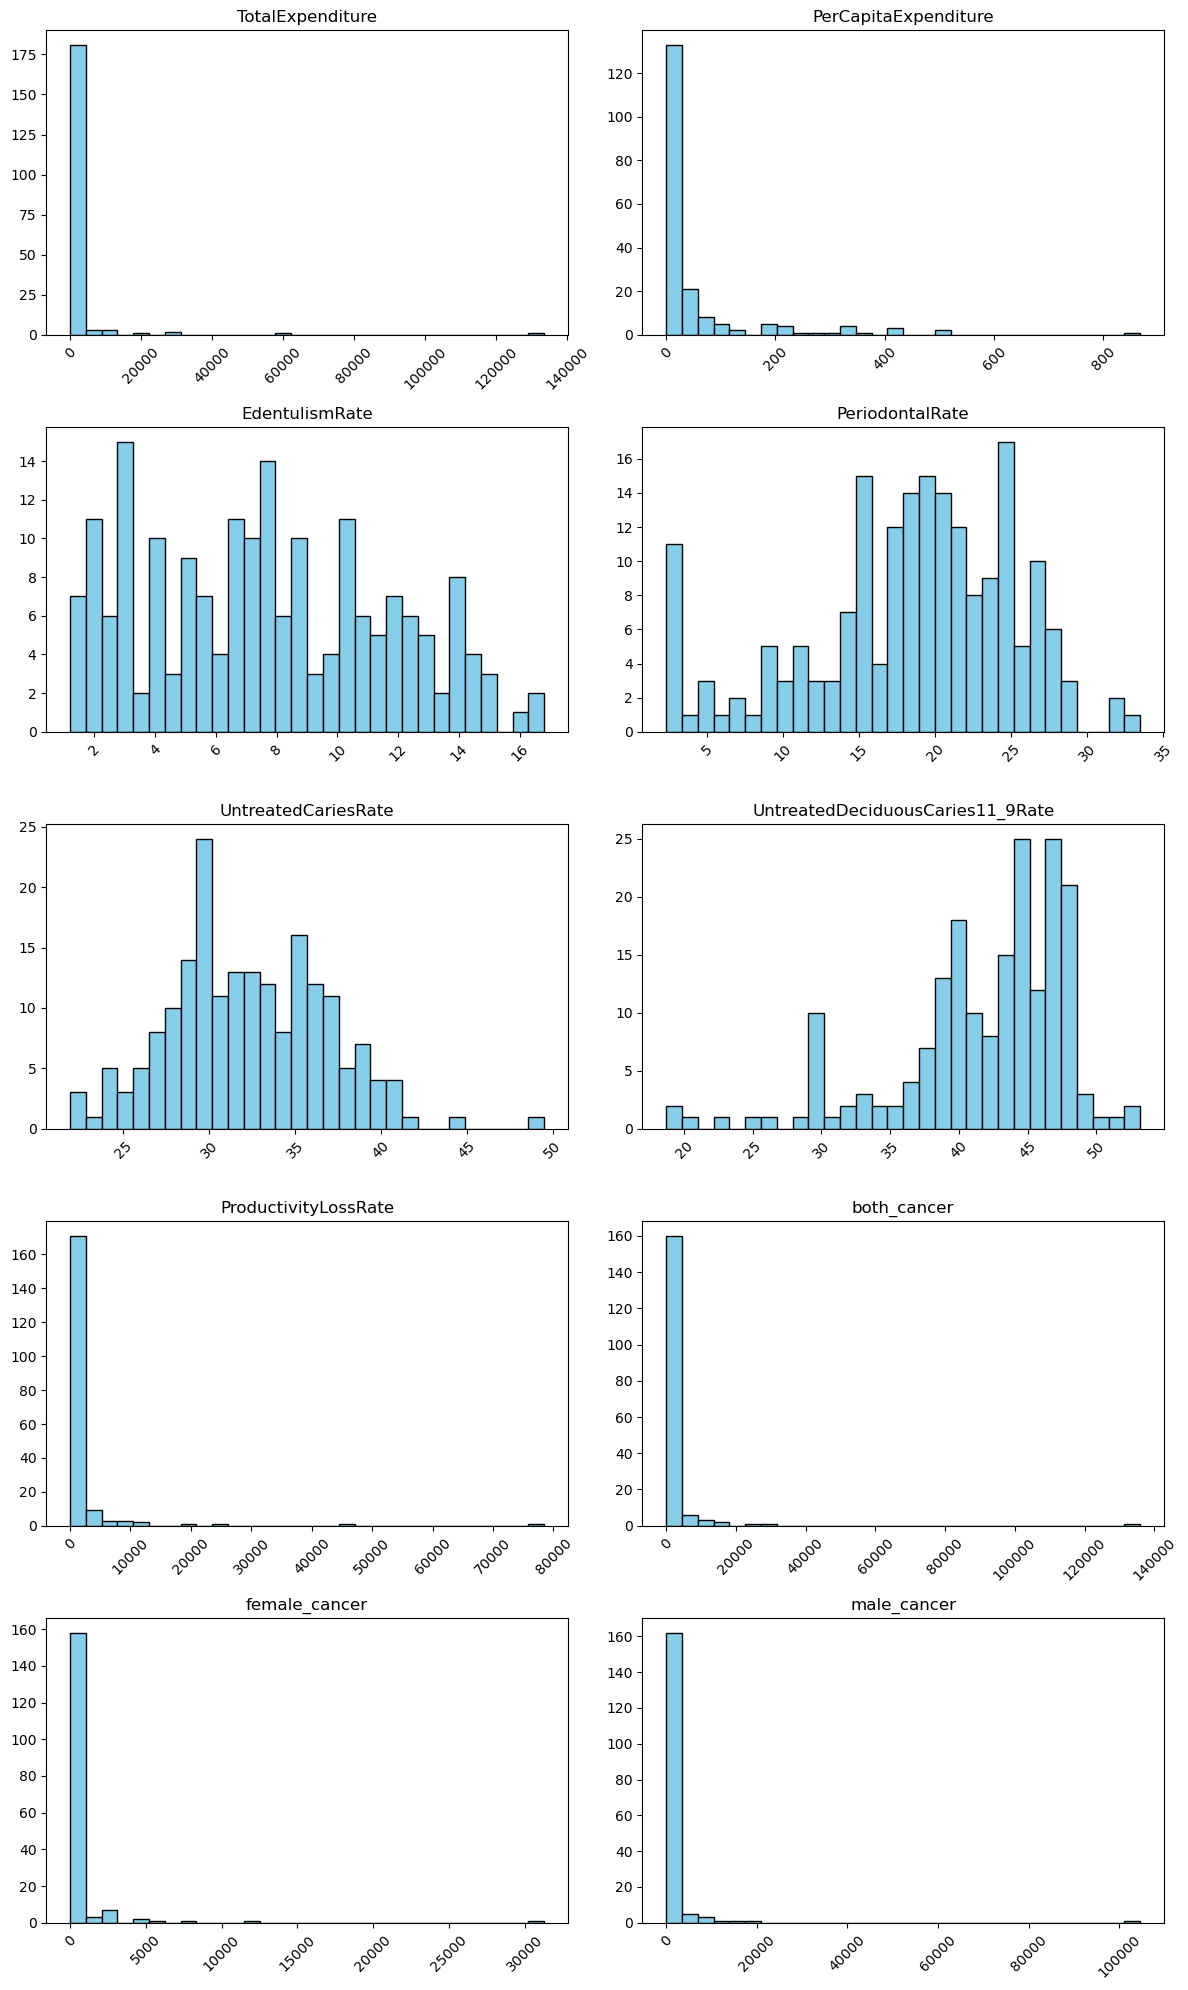

In [16]:
numeric_cols = [
    "TotalExpenditure",
    "PerCapitaExpenditure",
    "EdentulismRate",
    "PeriodontalRate",
    "UntreatedCariesRate",
    "UntreatedDeciduousCaries11_9Rate",
    "ProductivityLossRate",
    "both_cancer",
    "female_cancer",
    "male_cancer"
]

# 2 s√ºtunlu subplot, satƒ±r sayƒ±sƒ± otomatik
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols  # s√ºtun sayƒ±sƒ±na g√∂re satƒ±r sayƒ±sƒ±nƒ± ayarla

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# Fazla bo≈ü subplotlarƒ± gizle
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows*n_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [17]:
#En √ßok harcama yapan 10 √ºlke
top_total_expenditure = df.sort_values("TotalExpenditure", ascending=False).head(10)

print("En √ßok harcama yapan 10 √ºlke:")
print(top_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]].to_string(index=False))


En √ßok harcama yapan 10 √ºlke:
                                     Location  TotalExpenditure  PerCapitaExpenditure
                        UnitedStatesofAmerica          133505.8                 405.5
                                        China           61548.6                  44.0
                                      Germany           30877.3                 372.2
                                        Japan           28733.6                 227.7
                                        Italy           19123.0                 316.8
                                       Canada           12829.1                 342.5
                                       France           12666.0                 195.4
UnitedKingdomofGreatBritainandNorthernIreland            9576.9                 143.2
                                        Spain            8306.3                 178.0
                                    Australia            7370.3                 288.3


In [18]:
# En d√º≈ü√ºk harcama yapan 10 √ºlke
low_total_expenditure = df.sort_values("TotalExpenditure", ascending=True).head(10)
print("\nEn d√º≈ü√ºk harcama yapan 10 √ºlke:")
print(low_total_expenditure[["Location", "TotalExpenditure", "PerCapitaExpenditure"]])


En d√º≈ü√ºk harcama yapan 10 √ºlke:
                     Location  TotalExpenditure  PerCapitaExpenditure
20                      Kenya               0.0                   0.0
48                   Cambodia               0.0                   0.0
97                       Iraq               0.0                   0.0
72                     Gambia               0.0                   0.0
106                    Bhutan               0.0                   0.1
128                     Niger               0.0                   0.0
60   UnitedRepublicofTanzania               0.1                   0.0
56                    Vanuatu               0.1                   0.5
174        SaoTomeandPrincipe               0.1                   0.6
168                  Ethiopia               0.1                   0.0


In [19]:

health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate","ProductivityLossRate"]

# √úlkeleri toplam harcama sƒ±rasƒ±na g√∂re g√∂ster
df_top_spenders_health = top_total_expenditure[["Location"] + health_cols]
print("\nEn √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:")

# Tek satƒ±rda g√∂stermek i√ßin
print(df_top_spenders_health.to_string(index=False))



En √ßok harcama yapan 10 √ºlkenin saƒülƒ±k g√∂stergeleri:
                                     Location  EdentulismRate  PeriodontalRate  UntreatedCariesRate  UntreatedDeciduousCaries11_9Rate  ProductivityLossRate
                        UnitedStatesofAmerica            10.2             15.7                 24.3                              42.6               78468.5
                                        China             5.7             17.5                 24.6                              47.2               45713.1
                                      Germany            11.7             27.4                 31.7                              29.1               19395.9
                                        Japan            11.7             20.6                 25.8                              39.5               23663.0
                                        Italy            12.9             18.2                 29.6                              36.1                9541.6
     

C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\831675181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PerCapitaExpenditure", y="Location", data=top_total_expenditure, palette="viridis")


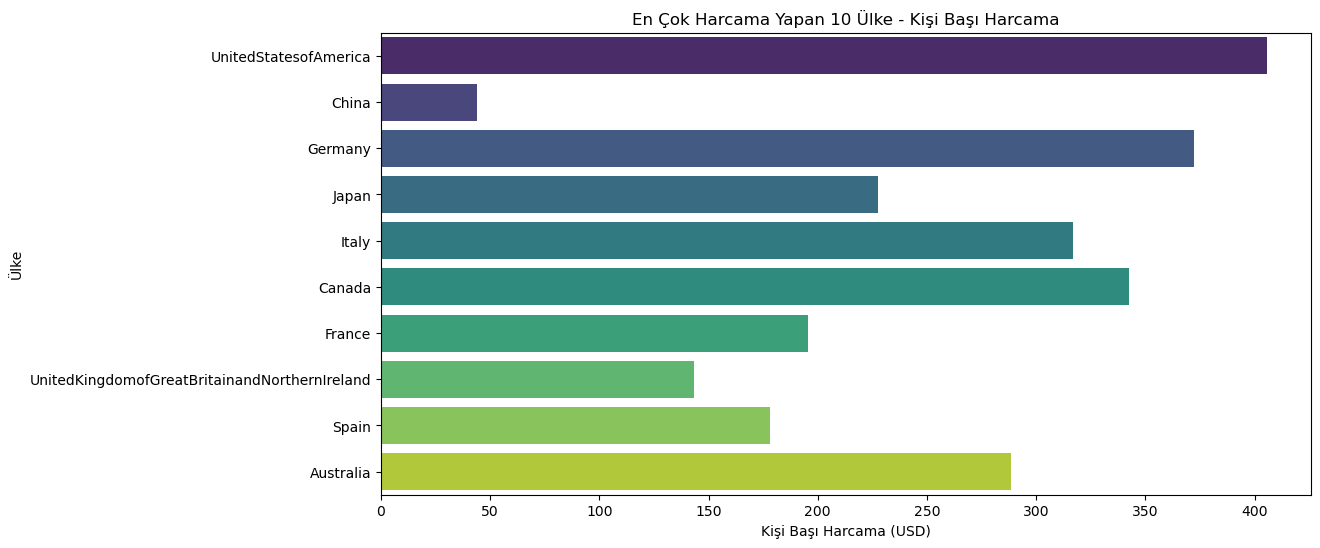

In [20]:

# √ñrnek: Top 10 √ºlke, ki≈üi ba≈üƒ± harcama
plt.figure(figsize=(12,6))
sns.barplot(x="PerCapitaExpenditure", y="Location", data=top_total_expenditure, palette="viridis")
plt.title("En √áok Harcama Yapan 10 √úlke - Ki≈üi Ba≈üƒ± Harcama")
plt.xlabel("Ki≈üi Ba≈üƒ± Harcama (USD)")
plt.ylabel("√úlke")
plt.show()


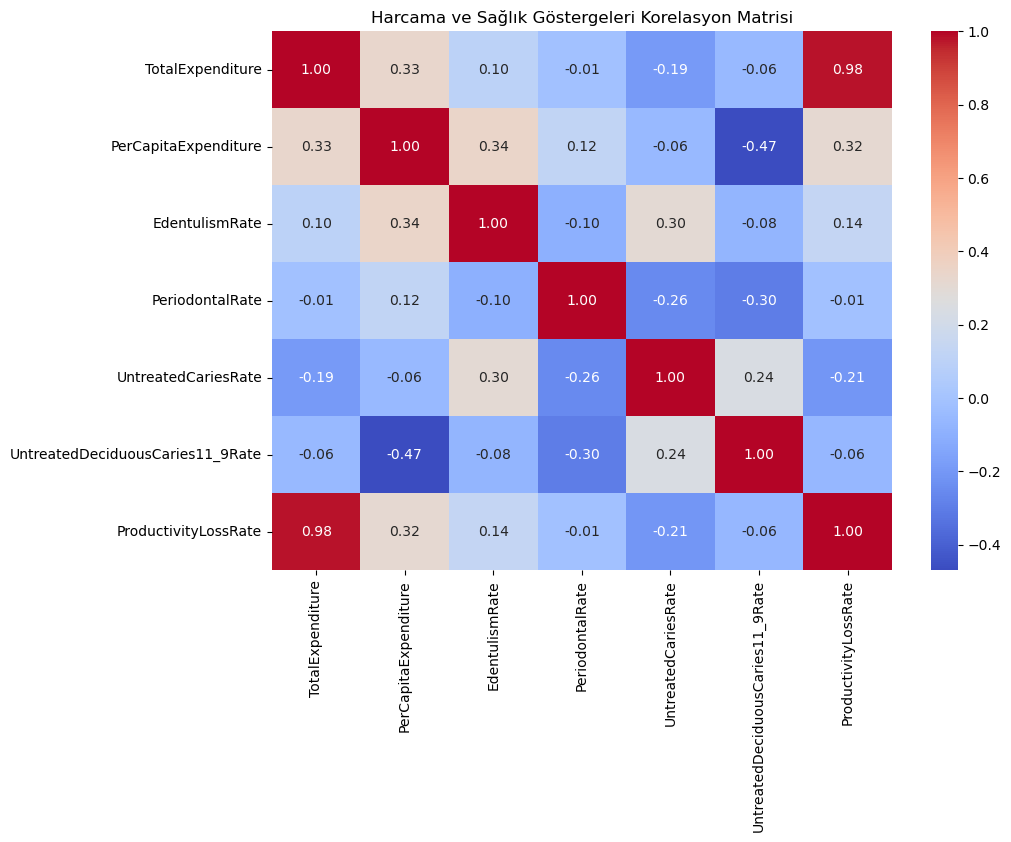

In [21]:
# Korelasyon i√ßin sayƒ±sal s√ºtunlar
numeric_for_corr = ["TotalExpenditure", "PerCapitaExpenditure", 
                    "EdentulismRate", "PeriodontalRate", 
                    "UntreatedCariesRate", "UntreatedDeciduousCaries11_9Rate",
                    "ProductivityLossRate"]

# Korelasyon matrisi
corr = df[numeric_for_corr].corr()

# Heatmap ile g√∂rselle≈ütirme
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Harcama ve Saƒülƒ±k G√∂stergeleri Korelasyon Matrisi")
plt.show()


In [22]:
# TotalExpenditure'e g√∂re 3 gruba ayƒ±r (Low, Medium, High)
df["ExpenditureGroup"] = pd.qcut(df["TotalExpenditure"], 3, labels=["Low", "Medium", "High"])

# Gruplara g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±
health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate"]

grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()
print("Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±:")
print(grouped_health)

Harcama gruplarƒ±na g√∂re saƒülƒ±k g√∂stergelerinin ortalamasƒ±:
                  EdentulismRate  PeriodontalRate  UntreatedCariesRate  \
ExpenditureGroup                                                         
Low                     4.493750        18.701563            31.628125   
Medium                  8.445312        17.728125            32.607813   
High                    9.995313        18.889063            32.532812   

                  UntreatedDeciduousCaries11_9Rate  ProductivityLossRate  
ExpenditureGroup                                                          
Low                                      42.221875             37.326563  
Medium                                   43.009375            273.854688  
High                                     39.970312           4730.800000  


C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\950018395.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_health = df.groupby("ExpenditureGroup")[health_cols].mean()


C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\2587328391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")


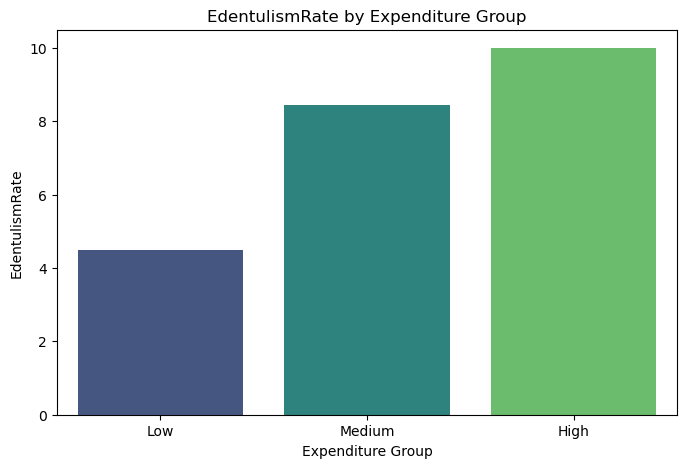

C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\2587328391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")


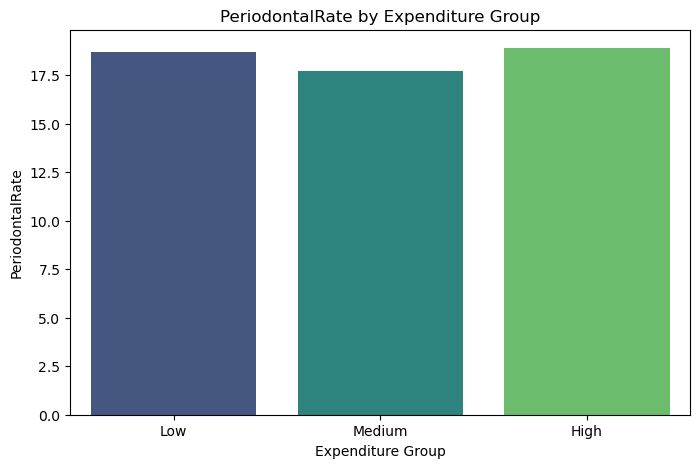

C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\2587328391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")


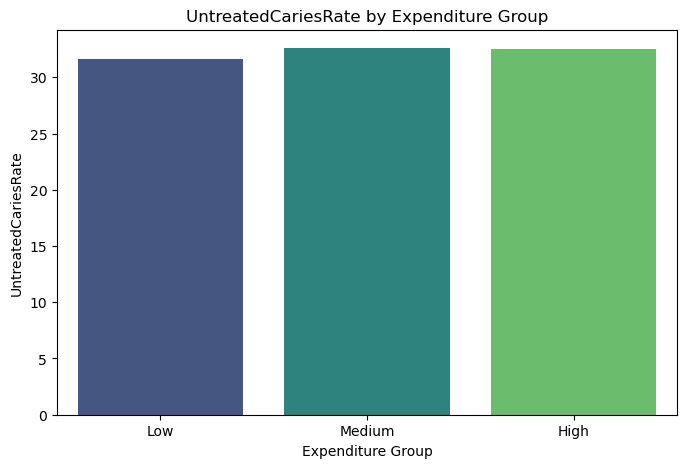

C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\2587328391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")


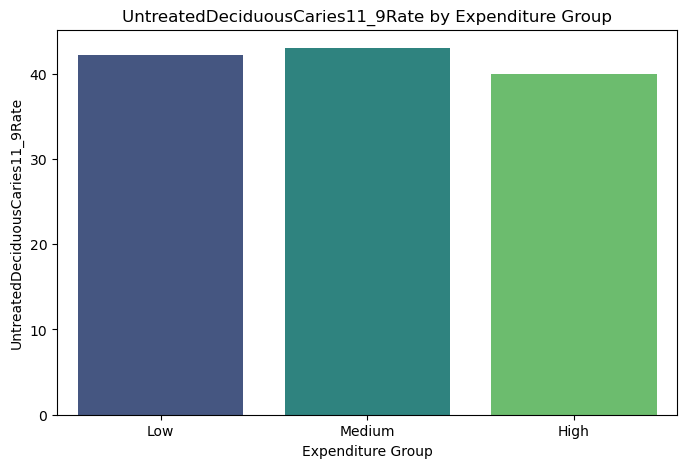

C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\2587328391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")


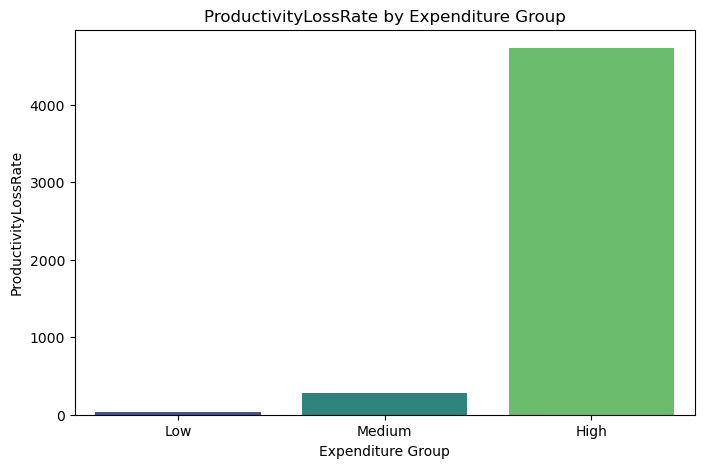

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her saƒülƒ±k g√∂stergesi i√ßin gruplara g√∂re barplot
for col in health_cols:
    plt.figure(figsize=(8,5))
    sns.barplot(x=grouped_health.index, y=grouped_health[col], palette="viridis")
    plt.title(f"{col} by Expenditure Group")
    plt.xlabel("Expenditure Group")
    plt.ylabel(col)
    plt.show()


C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\654117084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=top20_caries, palette="magma")


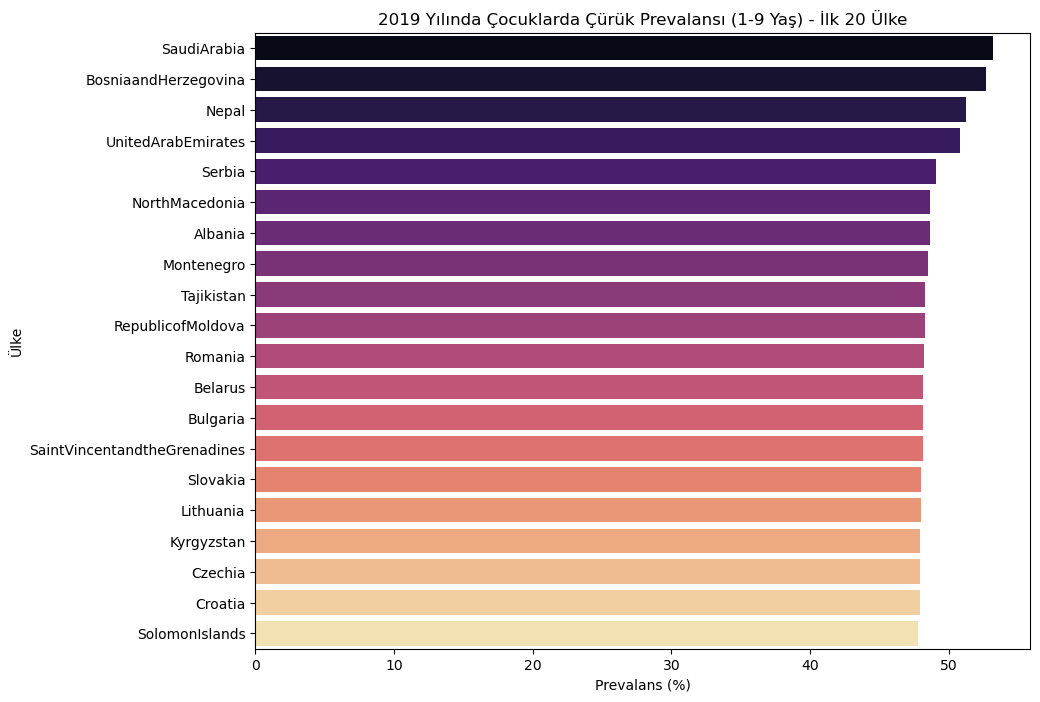

In [24]:
#2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke
# En y√ºksek 20 √ºlkeyi se√ß
top20_caries = df.nlargest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=top20_caries, palette="magma")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - ƒ∞lk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


In [25]:
# En d√º≈ü√ºk 20 √ºlkeyi se√ß
bottom20_caries = df.nsmallest(20, "UntreatedDeciduousCaries11_9Rate")

plt.figure(figsize=(10,8))
sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=bottom20_caries, palette="cool")
plt.title("2019 Yƒ±lƒ±nda √áocuklarda √á√ºr√ºk Prevalansƒ± (1-9 Ya≈ü) - En D√º≈ü√ºk 20 √úlke")
plt.xlabel("Prevalans (%)")
plt.ylabel("√úlke")
plt.show()


C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\592134809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="UntreatedDeciduousCaries11_9Rate", y="Location", data=bottom20_caries, palette="cool")


In [26]:
countries = ["Germany", "T√ºrkiye"]
df_countries = df[df["Location"].isin(countries)]


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

health_cols = ["EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
               "UntreatedDeciduousCaries11_9Rate"]

plt.figure(figsize=(12,6))
df_melted = df_countries.melt(id_vars=["Location"], value_vars=health_cols,
                              var_name="HealthIndicator", value_name="Value")

sns.barplot(x="HealthIndicator", y="Value", hue="Location", data=df_melted, palette="Set2")
plt.title("Almanya ve T√ºrkiye: Saƒülƒ±k G√∂stergeleri Kar≈üƒ±la≈ütƒ±rmasƒ± (2019)")
plt.xlabel("Saƒülƒ±k G√∂stergesi")
plt.ylabel("Deƒüer")
plt.xticks(rotation=45)
plt.show()


C:\Users\nesri\AppData\Local\Temp\ipykernel_35732\58164791.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="both_cancer", y="Location", data=top20_cancer, palette="Reds")


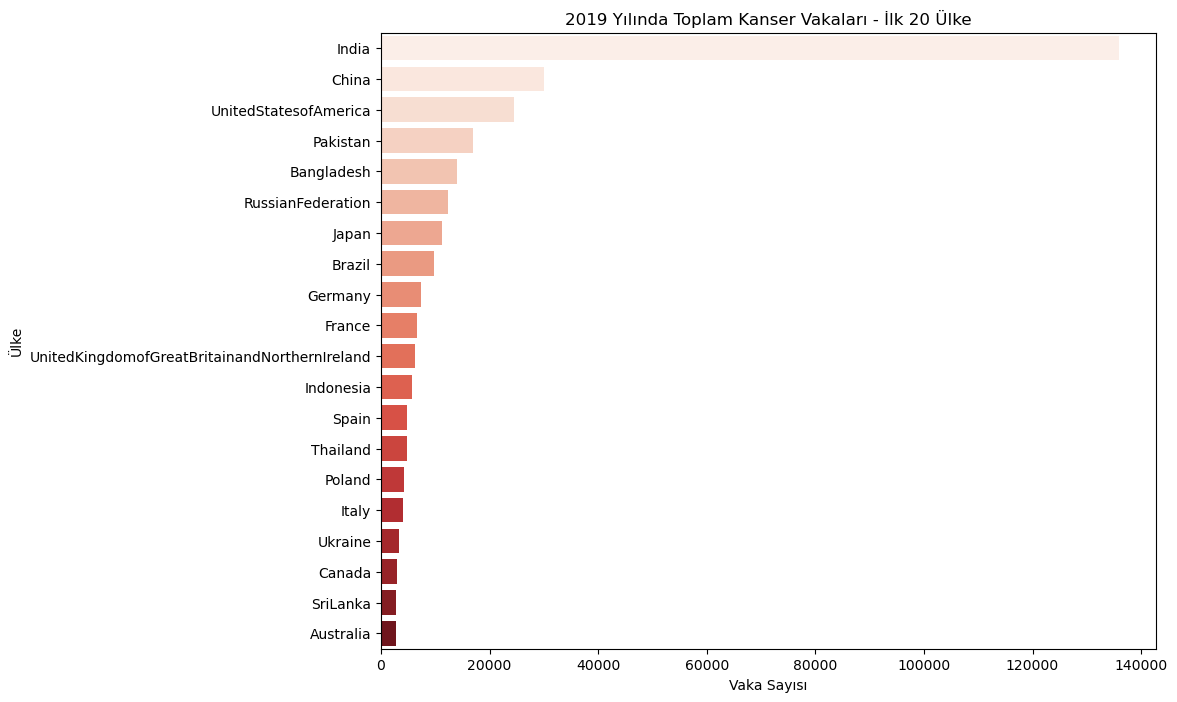

In [28]:
# Toplam kanser vaka sayƒ±sƒ±na g√∂re ilk 20 √ºlke
top20_cancer = df.nlargest(20, "both_cancer")

plt.figure(figsize=(10,8))
sns.barplot(x="both_cancer", y="Location", data=top20_cancer, palette="Reds")
plt.title("2019 Yƒ±lƒ±nda Toplam Kanser Vakalarƒ± - ƒ∞lk 20 √úlke")
plt.xlabel("Vaka Sayƒ±sƒ±")
plt.ylabel("√úlke")
plt.show()


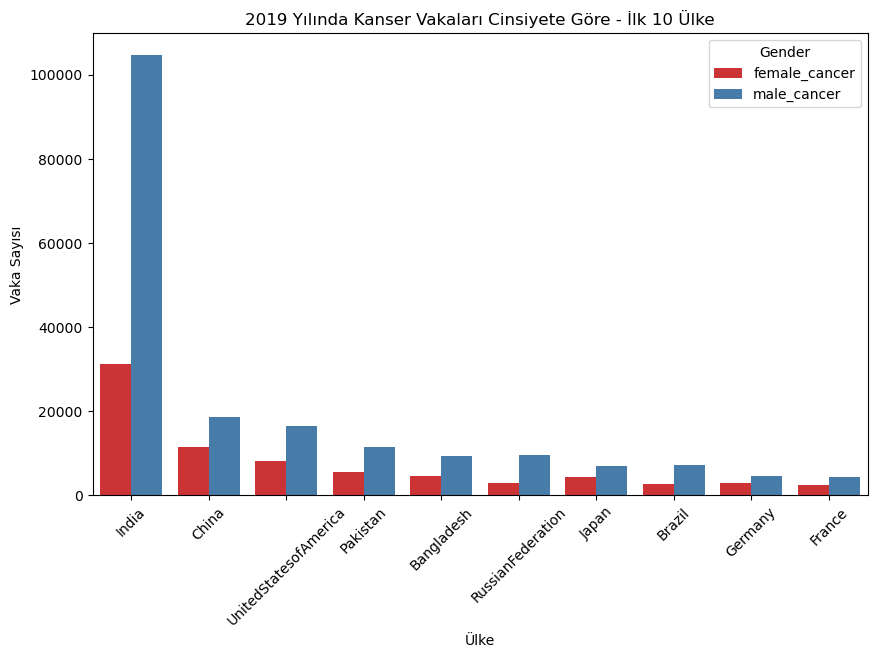

In [29]:
# Sadece ilk 10 √ºlke ile √∂rnek
top10_cancer = df.nlargest(10, "both_cancer")
cancer_cols = ["female_cancer", "male_cancer"]

df_melted = top10_cancer.melt(id_vars=["Location"], value_vars=cancer_cols,
                               var_name="Gender", value_name="Cases")

plt.figure(figsize=(10,6))
sns.barplot(x="Location", y="Cases", hue="Gender", data=df_melted, palette="Set1")
plt.title("2019 Yƒ±lƒ±nda Kanser Vakalarƒ± Cinsiyete G√∂re - ƒ∞lk 10 √úlke")
plt.xlabel("√úlke")
plt.ylabel("Vaka Sayƒ±sƒ±")
plt.xticks(rotation=45)
plt.show()


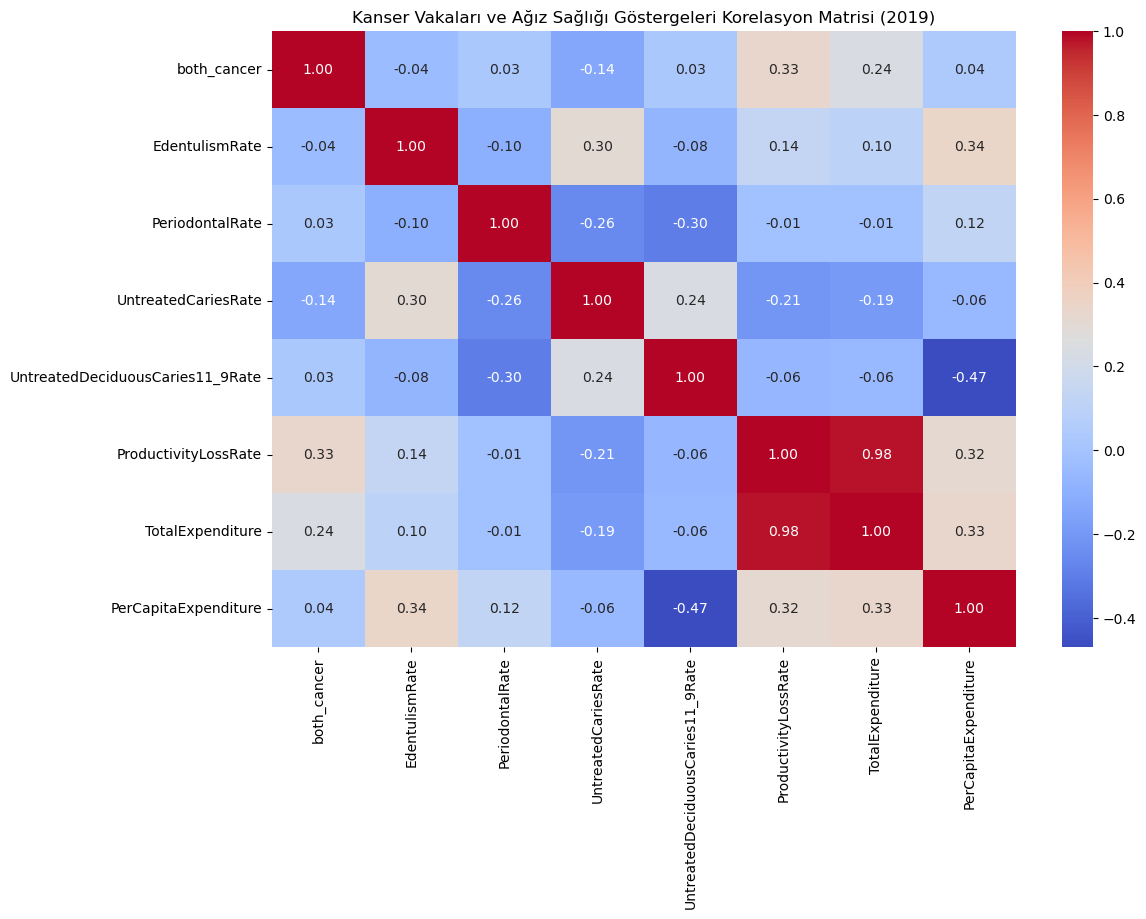

In [30]:
#Heatmap ile hem kanser ve aƒüƒ±z saƒülƒ±ƒüƒ± hem de kanser ve harcama ili≈ükileri
corr_cols = ["both_cancer","EdentulismRate", "PeriodontalRate", "UntreatedCariesRate",
             "UntreatedDeciduousCaries11_9Rate", "ProductivityLossRate",
             "TotalExpenditure", "PerCapitaExpenditure"]

corr_df = df[corr_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Kanser Vakalarƒ± ve Aƒüƒ±z Saƒülƒ±ƒüƒ± G√∂stergeleri Korelasyon Matrisi (2019)")
plt.show()


In [31]:
#Maschine Learning √ñnerileri

#1Ô∏è‚É£ Regresyon Modelleri

#Ama√ß: S√ºrekli deƒüerleri tahmin etmek.

#Hedef deƒüi≈üken (target):

#ProductivityLossRate ‚Üí aƒüƒ±z saƒülƒ±ƒüƒ± ile √ºretkenlik kaybƒ± arasƒ±ndaki ili≈ükiyi tahmin et

#UntreatedDeciduousCaries11_9Rate ‚Üí √ßocuklarda √ß√ºr√ºk prevalansƒ±nƒ± tahmin et

#√ñzellikler (features):

#TotalExpenditure, PerCapitaExpenditure

#EdentulismRate, PeriodontalRate, UntreatedCariesRate

#both_cancer, female_cancer, male_cancer

#Kullanƒ±labilecek modeller: Linear Regression, Random Forest, XGBoost

#2Ô∏è‚É£ Sƒ±nƒ±flandƒ±rma (Classification)

#Ama√ß: √úlkeleri gruplara ayƒ±rmak.

#Hedef deƒüi≈üken:

#Harcama seviyesine g√∂re gruplama ‚Üí Low / Medium / High

#√á√ºr√ºk prevalansƒ±na g√∂re sƒ±nƒ±flandƒ±rma ‚Üí D√º≈ü√ºk / Orta / Y√ºksek

#√ñzellikler: Diƒüer saƒülƒ±k g√∂stergeleri, kanser vakalarƒ±, ki≈üi ba≈üƒ± harcama vb.

#Kullanƒ±labilecek modeller: Logistic Regression, Random Forest, XGBoost, SVM

#3Ô∏è‚É£ K√ºmeleme (Clustering)

#Ama√ß: Benzer √ºlkeleri otomatik gruplama.

#√ñzellikler: T√ºm sayƒ±sal g√∂stergeler (TotalExpenditure, PerCapitaExpenditure, saƒülƒ±k g√∂stergeleri, kanser vakalarƒ± vb.)

#Kullanƒ±lacak y√∂ntemler:

#K-Means ‚Üí √ºlkeleri sayƒ±sal √∂zelliklerine g√∂re k gruba ayƒ±rƒ±r

#Hierarchical Clustering ‚Üí hiyerar≈üik benzerlik analizi

#G√∂rselle≈ütirme: PCA ile 2D projeksiyon, renkler = k√ºmeler

#4Ô∏è‚É£ Feature Importance Analizi

#Hangi deƒüi≈ükenler √ßocuklarda √ß√ºr√ºk, ProductivityLossRate veya kanser vakalarƒ±nƒ± en √ßok etkiliyor?

#Random Forest veya XGBoost kullanarak feature importance √ßƒ±karabiliriz.

#5Ô∏è‚É£ √ñrnek Pipeline

#Veriyi temizle ‚Üí eksik deƒüerleri doldur, aykƒ±rƒ± deƒüerleri cap‚Äôle

#Sayƒ±sal s√ºtunlarƒ± normalize / standardize et

#Hedef deƒüi≈ükeni se√ß ve features ile ayƒ±r

#Train-test split yap (√∂rn. 80-20)

#Model se√ß ve eƒüit

#Model performansƒ±nƒ± deƒüerlendir: RMSE, MAE (regresyon) veya Accuracy, F1-score (sƒ±nƒ±flandƒ±rma)

#üí° √ñzetle:

#Regresyon ‚Üí √ºretkenlik kaybƒ± veya √ß√ºr√ºk oranƒ± tahmini

#Sƒ±nƒ±flandƒ±rma ‚Üí √ºlkeleri saƒülƒ±k veya harcama kategorilerine ayƒ±rma

#K√ºmeleme ‚Üí benzer √ºlkeleri segmentleme